In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


%cd /content/gdrive/My Drive/hackathon/digital center/хакатон/
%ls

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1EMMRWEB_9gCSmnaLRszJOWMg0gcogEsh/hackathon/digital center/хакатон
 chunks.pkl                 fishnet_1.json    ldl.csv
 coords_ind.pkl             fishnet.json      Untitled0.ipynb
 coords_infected.csv        frames.pkl        геоданые/
'data_explore_1 AV.ipynb'   inf_squares.pkl  'Копия Untitled0.ipynb'


In [ ]:
pip install fiona --quiet

In [ ]:
pip install PyCRS --quiet

In [ ]:
pip install pyshp --quiet

In [ ]:
!pip install geopandas --quiet

In [ ]:
import pandas as pd
import numpy as np
import os
import shapefile
import fiona
import pickle
from tqdm import tqdm_notebook

In [ ]:
epidemic_spread = pd.read_excel('./геоданые/распространение заболевания. generated.xlsx')
date_time = epidemic_spread['date'].str.split('T',expand=True).rename(columns = {0:'Date',1:'Time'})
epidemic_spread = epidemic_spread.join(date_time).drop('date',1)

In [ ]:
epidemic_spread[500:600]

,address,Date,Time
500,"Город Москва, Улица Грина Дом 1 Корпус 1",2020-05-16,14:16:50.248Z
501,"Город Москва, Улица Новокосинская Дом 24 Корпус 1",2020-05-14,12:16:17.063Z
502,"Город Москва, Улица Новокосинская Дом 24 Корпус 1",2020-05-14,12:13:55.134Z
503,"Город Москва, Улица Дорожная Дом 32",2020-06-11,16:11:56.568Z
504,"Город Москва, Квартал 5-й Капотня Дом 8",2020-05-14,11:51:58.007Z
...,...,...,...
595,"Город Москва, Переулок Ангелов Дом 2",2020-05-18,07:30:24.044Z
596,"Город Москва, Переулок Ангелов Дом 2",2020-05-16,08:23:03.308Z
597,"Город Москва, Переулок Ангелов Дом 2",2020-05-17,15:15:07.311Z
598,"Город Москва, Переулок Ангелов Дом 2",2020-05-21,09:15:42.252Z


In [ ]:
pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim()

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
coor_infected = pd.read_csv('coords_infected.csv', nrows=3000)

# coor_infected.head()

coord_trash = coor_infected.coordinates
coord_trash = coord_trash.str.replace('(', '')
coord_trash = coord_trash.str.replace(')', '')
coord_trash = coord_trash.str.split(pat=',', expand=True).astype('float')

coor_infected['longitude'] = coord_trash[1]
coor_infected['latitude'] = coord_trash[0]
coor_infected['coordinates'] = list(zip(coor_infected['longitude'], coor_infected['latitude']))
# coor_infected['Date'] = pd.to_datetime(coor_infected['Date'])

In [87]:
coor_infected.head()

,address,Date,Time,coordinates,longitude,latitude
0,москва бульвар дмитрия донского дом 11,2020-05-14,16:20:34.516Z,"(37.5769079, 55.5692818)",37.576908,55.569282
1,москва бульвар дмитрия донского дом 11,2020-05-29,17:38:43.570Z,"(37.5769079, 55.5692818)",37.576908,55.569282
2,москва бульвар дмитрия донского дом 11,2020-05-18,10:14:42.992Z,"(37.5769079, 55.5692818)",37.576908,55.569282
3,москва бульвар дмитрия донского дом 11,2020-06-01,13:15:32.918Z,"(37.5769079, 55.5692818)",37.576908,55.569282
4,москва бульвар дмитрия донского дом 11,2020-06-21,10:46:46.946Z,"(37.5769079, 55.5692818)",37.576908,55.569282


In [ ]:
import folium

map = folium.Map(location=[54.2908802292932, 38.678917098098], zoom_start = 8)
# folium.Marker([54.2908802292932, 38.678917098098], popup='<i>Mt. Hood Meadows</i>').add_to(map)


for ind, item in coor_infected.iterrows():
    folium.Circle(
        radius=50,
        location=[item.latitude, item.longitude],
        # popup='The Waterfront,
        color='crimson',
        fill=True,
    ).add_to(map)


# map

In [ ]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
# import earthpy as et

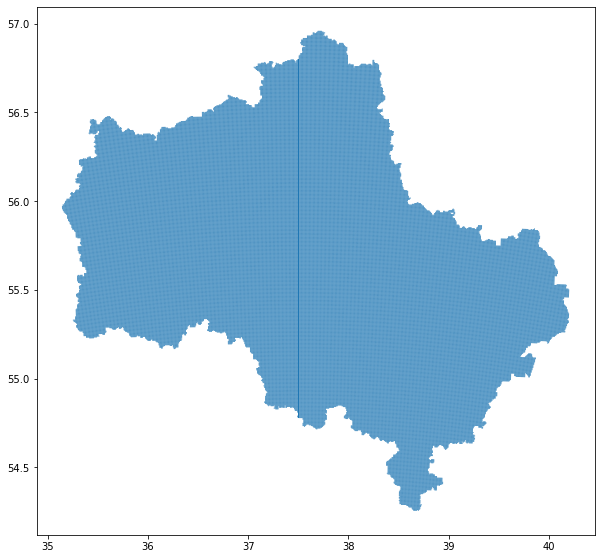

In [ ]:
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,10))
shapes.plot(ax=ax)
plt.show()

In [ ]:
df = pd.read_pickle('frames.pkl')

In [49]:
df.head()

,zid,square,XZ,4,0_one,1_one,0_two,1_two,0_three,1_three,0_four,1_four,neaighbours
0,72137,249834.0,427489.0,"(38.678917098098, 54.2908802292932)",38.678917,54.290880,38.679045,54.295372,38.686724,54.295297,38.686595,54.290805,"[56, 248, 449, 528, 608, 4439]"
1,9759,249843.0,427928.0,"(38.5647888846116, 54.3323767905076)",38.564789,54.332377,38.564905,54.336869,38.572592,54.336800,38.572475,54.332309,"[164, 329, 4782, 4929, 5200, 5345]"
2,118792,249834.0,428368.0,"(38.6890548087688, 54.376144215557)",38.689055,54.376144,38.689185,54.380636,38.696879,54.380560,38.696749,54.376068,"[28, 267, 460, 1184, 4801, 5169]"
3,33066,249729.0,439110.0,"(40.1409520652149, 55.4046324892176)",40.140952,55.404632,40.141252,55.409119,40.149138,55.408949,40.148838,55.404462,"[806, 4471, 4644, 5186, 98045, 188850]"
4,59909,249897.0,439766.0,"(37.8516652258544, 55.437132605373)",37.851665,55.437133,37.851705,55.441624,37.859606,55.441601,37.859566,55.437110,"[113, 582, 1984, 6230, 100390, 189878]"


In [ ]:
from folium import plugins

In [43]:
map = folium.Map(
    location=[55.75, 37.6],
    zoom_start=11,
    height='70%',
    width='70%',
    min_lat=54, 
    max_lat=58,
    min_lon=35,
    max_lon=40,
)

points = coor_infected[['address', 'Date', 'coordinates']]

features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': point['coordinates'],
        },
        'properties': {
            'time': point['Date'],
            'popup': point['address'],
            # 'id': 'house',
            'icon': 'circle',
            'iconstyle': {
                'color': 'red',
                'fillColor': 'red',
                'fillOpacity': 0.6,
                # 'stroke': 'false',
                'radius': 5
            }}
    } for _, point in points.iterrows()
] 

plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
    }, 
    period='P1D', 
    add_last_point=True,
    date_options='YYYY/MM/DD',
    time_slider_drag_update=True,
).add_to(map)

map

In [82]:
forecasts = pd.read_pickle('forecast_1.pkl')

In [88]:
forecasts[10]

,Time,Susceptible,Infected,Resistant,zid
0,2020-04-06,1395.025000,5.000000,0.000000,145439.0
1,2020-04-07,1393.530357,6.444643,0.050000,145439.0
2,2020-04-08,1391.605933,8.304621,0.114446,145439.0
3,2020-04-09,1389.129529,10.697978,0.197493,145439.0
4,2020-04-10,1385.945112,13.775416,0.304472,145439.0
5,2020-04-11,1381.854049,17.728725,0.442227,145439.0
6,2020-04-12,1376.604462,22.801025,0.619514,145439.0


In [84]:
df[df['zid'] == forecast[3]['zid'][0]].index.tolist()

[101740]

In [85]:
df.loc[101740]

zid                                                 112652
square                                              249892
XZ                                                  442714
4                     (37.9176697044627, 55.7019315431241)
0_one                                              37.9177
1_one                                              55.7019
0_two                                              37.9177
1_two                                              55.7064
0_three                                            37.9257
1_three                                            55.7064
0_four                                             37.9256
1_four                                             55.7019
neaighbours    [12036, 13107, 13878, 16885, 22579, 108112]
Name: 101740, dtype: object

In [86]:
map = folium.Map(
    location=[55.75, 37.6],
    zoom_start=11,
    height='70%',
    width='70%',
    min_lat=54, 
    max_lat=58,
    min_lon=35,
    max_lon=40,
)

coord = [(37.9176697044627, 55.7019315431241)]
dates = forecasts[3]['Time']
pop = forecast[3]['Susceptible'] 
point_forecast = pd.DataFrame([dates, coord, pop], columns=['Time', 'coordinates', 'pop'])

point_forecast


# features = [
#     {
#         'type': 'Feature',
#         'geometry': {
#             'type': 'Point',
#             'coordinates': points_forecast['coordinates'],
#         },
#         'properties': {
#             'time': points_forecast['Time'],
#             'popup': forecast,
#             # 'id': 'house',
#             'icon': 'circle',
#             'iconstyle': {
#                 'color': 'red',
#                 'fillColor': 'red',
#                 'fillOpacity': 0.6,
#                 # 'stroke': 'false',
#                 'radius': 5
#             }}
#     } for _, point in points.iterrows()
# ] 

# plugins.TimestampedGeoJson({
#     'type': 'FeatureCollection',
#     'features': features,
#     }, 
#     period='P1D', 
#     add_last_point=True,
#     date_options='YYYY/MM/DD',
#     time_slider_drag_update=True,
# ).add_to(map)

# map

AttributeError: ignored